# Import Necessary Libraries

In [66]:
import pandas as pd
import numpy as np
import seaborn as sns

# Data Loading

In [67]:
data = pd.read_csv("C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/data/2022.csv")
data.head()

,tpep_pickup_datetime,passenger_demand,taxi_demand
0,2022-03-31 15:00:00,4,4
1,2022-03-31 16:00:00,3,3
2,2022-03-31 17:00:00,0,0
3,2022-03-31 18:00:00,0,0
4,2022-03-31 19:00:00,0,0


In [68]:
data.shape

(21624, 3)

# Checking Duplicates

In [69]:
duplicates = data.duplicated()
print(duplicates)

0        False
1        False
2        False
3        False
4        False
         ...  
21619    False
21620    False
21621    False
21622    False
21623    False
Length: 21624, dtype: bool


In [70]:
# Check for duplicate values
value_counts  = data.duplicated().value_counts()
print(value_counts )

False    18610
True      3014
Name: count, dtype: int64


In [71]:
duplicates_subset = data.duplicated(subset=['tpep_pickup_datetime'])
print(duplicates_subset)

0        False
1        False
2        False
3        False
4        False
         ...  
21619     True
21620     True
21621     True
21622     True
21623     True
Length: 21624, dtype: bool


In [72]:
# Check for duplicate values
value_counts_subset  = duplicates_subset.duplicated().value_counts()
print(value_counts_subset )

True     21622
False        2
Name: count, dtype: int64


### As we can see there is 3014 duplicates values we have to remove it

# Droping Duplicates

In [73]:
# drop_duplicates = duplicates.drop_duplicates()

In [74]:
# # Check for duplicate values again now
# value_counts  = drop_duplicates.duplicated().value_counts()
# print(value_counts )

# Handling Missing Values
- Detect
- Remove or Drop
- Filtering
- if the data is categorical then we have to use "Mode"
- if data is numerical, we have to use "mean", and "median".

# Detect Missing values

In [75]:
data.isnull()

,tpep_pickup_datetime,passenger_demand,taxi_demand
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
21619,False,False,False
21620,False,False,False
21621,False,False,False
21622,False,False,False


In [76]:
data.isnull().sum()

tpep_pickup_datetime    0
passenger_demand        0
taxi_demand             0
dtype: int64

In [77]:
data.isnull().sum().value_counts()

0    3
Name: count, dtype: int64

In [88]:
data.isnull().sum(axis=1)

0        0
1        0
2        0
3        0
4        0
        ..
21619    0
21620    0
21621    0
21622    0
21623    0
Length: 21624, dtype: int64

In [91]:
data.isnull().sum(axis=1).value_counts()

0    21624
Name: count, dtype: int64

In [92]:
passenger_demand = data['passenger_demand'].value_counts()
passenger_demand

passenger_demand
0        12738
1           30
2           19
3           19
4           16
         ...  
5138         1
5185         1
5520         1
6090         1
12210        1
Name: count, Length: 6057, dtype: int64

In [97]:
passenger_demand.isnull().sum()

0

In [98]:
taxi_demand = data['taxi_demand'].value_counts()
taxi_demand

taxi_demand
0       12738
1          48
2          25
3          19
4           9
        ...  
3327        1
8683        1
4197        1
4595        1
8576        1
Name: count, Length: 5243, dtype: int64

In [99]:
taxi_demand.isnull().sum()

0

### There is no Missing Value

# Remove or Drop

In [18]:
#### data.dropna(inplace=True)

# Drop a single row by index
#### data.drop(2, inplace=True)

# Drop multiple rows by indices
#### data.drop([1, 3], inplace=True)

# Specify the column name with null values
# column_name = 'passenger_count'
# data = data[data[column_name].notna()]

### Filling with Median:
- <b>When to Use:</b> The median is a robust measure of central tendency and is a good choice when you have numeric data with a skewed distribution, outliers, or continuous variables. It's less sensitive to extreme values compared to the mean.
- Use the median when the dataset has numerical data and the null values are randomly distributed or when you want to fill in missing values in a way that doesn't depend on the sequence of data points.
- This is a common approach when you're working with numerical features like age, income, or any other continuous variable.

- <b>Example:</b> In a dataset of people's ages, if there are null values, filling them with the median age is a reasonable choice. It won't be significantly affected by outliers, and it preserves the overall distribution
- <b>When data numerical, continues but randomly distributed</b>

In [19]:
#### passenger_count = passenger_count.fillna(price.median())
#### passenger_count

In [20]:
#### new2 = passenger_count.ffill()
#### new2.isnull().sum()

### Filling from the previous row
Filling missing values with the previous row's value is a suitable approach when your data meets the following conditions:

- <b>Numerical:</b> Your data consists of numerical values, such as integers or real numbers.
- <b>Continuous:</b> The data represents a continuous variable, meaning that there are no discrete categories, and values can take any numeric value within a rang

- <b>Ordered :</b> Your data is naturally ordered or follows a sequence, such as time-series data, where values occur in a specific order or hava temporal relationship.
### Filling from next row
- Same as like previous row

In [21]:
#### new3 = passenger_count.bfill()
#### new3.isnull().sum()

In [22]:
### Filtering

## Handling Outliers
- Ways to handle
    - Detect Outliers
    - Dropping outliers
    - Imputation - Median
    - Quantile-based flooring and capping
    - Transformations - Log transformation can help to reduce the effect of outliers
- if the data is categorical then we have to use "Mode"
- if data is numerical, we have to use "mean", and "median".
- IsolationForest
- pyod

# Detect Outliers

<Axes: xlabel='passenger_demand'>

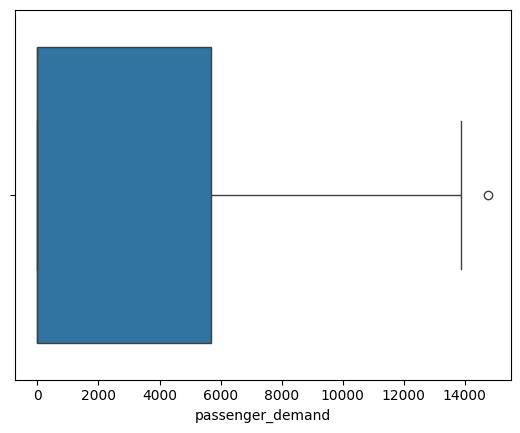

In [100]:
sns.boxplot(data = data, x = "passenger_demand")

<Axes: xlabel='passenger_demand'>

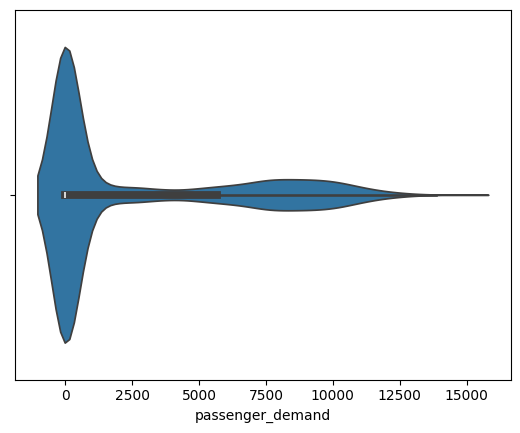

In [102]:
sns.violinplot(data = data, x = "passenger_demand")

<Axes: xlabel='taxi_demand'>

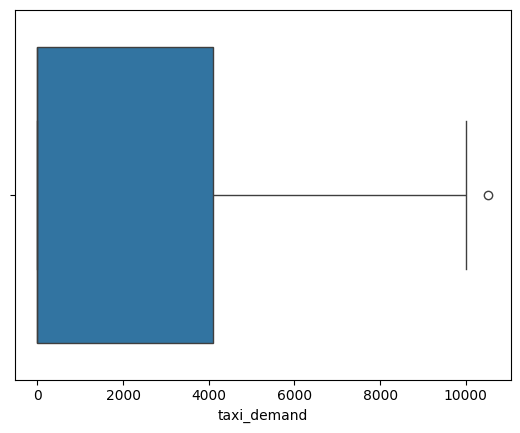

In [103]:
sns.boxplot(data = data, x = "taxi_demand")

<Axes: xlabel='taxi_demand'>

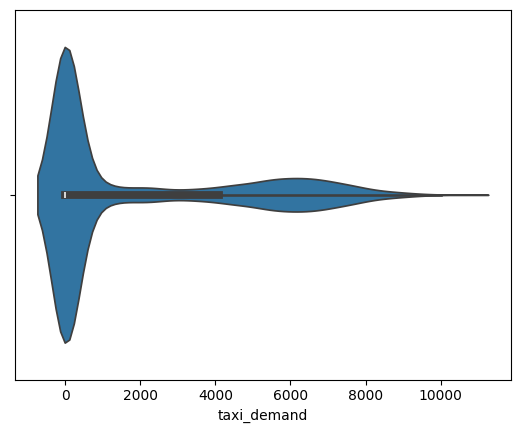

In [104]:
sns.violinplot(data = data, x = "taxi_demand")

### There is no outliers in "VendorID" and "passenger_count"

# IQR (Inter quartile Range) Method:

In [106]:
# using IQR
q1 = data['passenger_demand'].quantile(0.25) # 25% 
q3 = data['passenger_demand'].quantile(0.75) #75%
q1, q3

(0.0, 5685.0)

In [107]:
#### Determine the distance between the quartiles(IQR)
IQR = q3 - q1 #(5685.0 - 0.0)
IQR

5685.0

In [109]:
lower = q1 - (1.5*IQR) # 0.0 - ( 1.5 * 5685.0 )
upper = q3 + (1.5*IQR) # 5685.0 + ( 1.5 * 5685.0 )

In [111]:
lower, upper

(-8527.5, 14212.5)

In [113]:
filtered_data = data[(data['passenger_demand'] > upper) | (data['passenger_demand'] < lower)]
filtered_data

,tpep_pickup_datetime,passenger_demand,taxi_demand
27,2022-04-01 18:00:00,14770,10527


In [114]:
# using IQR
q1 = data['taxi_demand'].quantile(0.25) # 25% 
q3 = data['taxi_demand'].quantile(0.75) #75%
q1, q3

(0.0, 4103.25)

In [115]:
#### Determine the distance between the quartiles(IQR)
IQR = q3 - q1 #(4103.25 - 0.0)
IQR

4103.25

# Remove or Droping Outliers

In [32]:
# data1 = data.copy()

- <b>Way 1 Dropping Them</b>

In [33]:
# data_drop_outliers = data1[~((data1['passenger_count'] > upper) | (data1['passenger_count'] < lower))]
# data_drop_outliers

In [34]:
# outliers = data1[((data1['passenger_count'] > upper) | (data1['passenger_count'] < lower))].index
# print(outliers)

In [35]:
# data1.drop(outliers, inplace = True)

In [36]:
# sns.boxplot(data=data1, x='passenger_count')

# Imputation - Median

Imputation refers to the process of estimating or filling in missing or incomplete data in a dataset. This is typically done in statistical analysis, data preprocessing, or machine learning to handle missing values. There are various imputation techniques, such as mean imputation (replacing missing values with the mean of the available data), median imputation, mode imputation, and more advanced methods like regression imputation or K-nearest neighbors imputation. The goal of imputation is to provide a reasonable estimate for missing values while preserving the structure and integrity of the data.

In [37]:
# data2 = data.copy()

- <b>Way 2 - Imputing With Median</b>

In [38]:
# median = data2['passenger_count'].median()
# data2.loc[((data2['passenger_count'] > upper) | (data2['passenger_count'] < lower)), 'passenger_count'] = median
# data2

In [39]:
# sns.boxplot(data=data2, x='passenger_count')

# Quantile-based flooring and capping

In [40]:
# data3 = data.copy()

- <b>Way 3 - Flooring and Capping</b>

In [41]:
# floor = data3['passenger_count'].quantile(0.010)
# cap = data3['passenger_count'].quantile(0.90)

In [42]:
# data3.loc[(data3['passenger_count'] > upper), 'passenger_count'] = cap
# data3.loc[(data3['passenger_count'] < lower), 'passenger_count'] = floor

In [43]:
# sns.boxplot(data=data3, x='passenger_count')

# Transformations - Log transformation can help to reduce the effect of outliers

In [44]:
# data4 = data.copy()

- <b>Way - 4 Log Transformation</b>

In [45]:
# way4 = np.log(data4.passenger_count)
# way4

In [46]:
# data4['passenger_count'] = way4

In [47]:
# sns.boxplot(data=data4, x='passenger_count')

# Save Clean Data

In [69]:
data.to_csv(r"C:/Users/SRA/Desktop/backup/C/MLgrit/time_series_project/uber-taxi-demand/data/2022.Clean_Data.csv")

# Fixing Syntax Error